In [44]:
"""
Linkek:
https://towardsdatascience.com/tracking-keyword-trends-on-google-search-with-pytrends-cf97c43803f6
https://pypi.org/project/pytrends/#interest-by-region 
https://hands-on.cloud/pytrends-google-trends-api/ - timeframe részletesen
"""

import pandas as pd
from pytrends.request import TrendReq
from matplotlib import pyplot as plt

# TrendReq objektum felépítése - mert először ez kell
pytrends = TrendReq(hl='hu-HU', tz=60, timeout=(10,25),  retries=2, backoff_factor=0.2, requests_args={'verify':True})



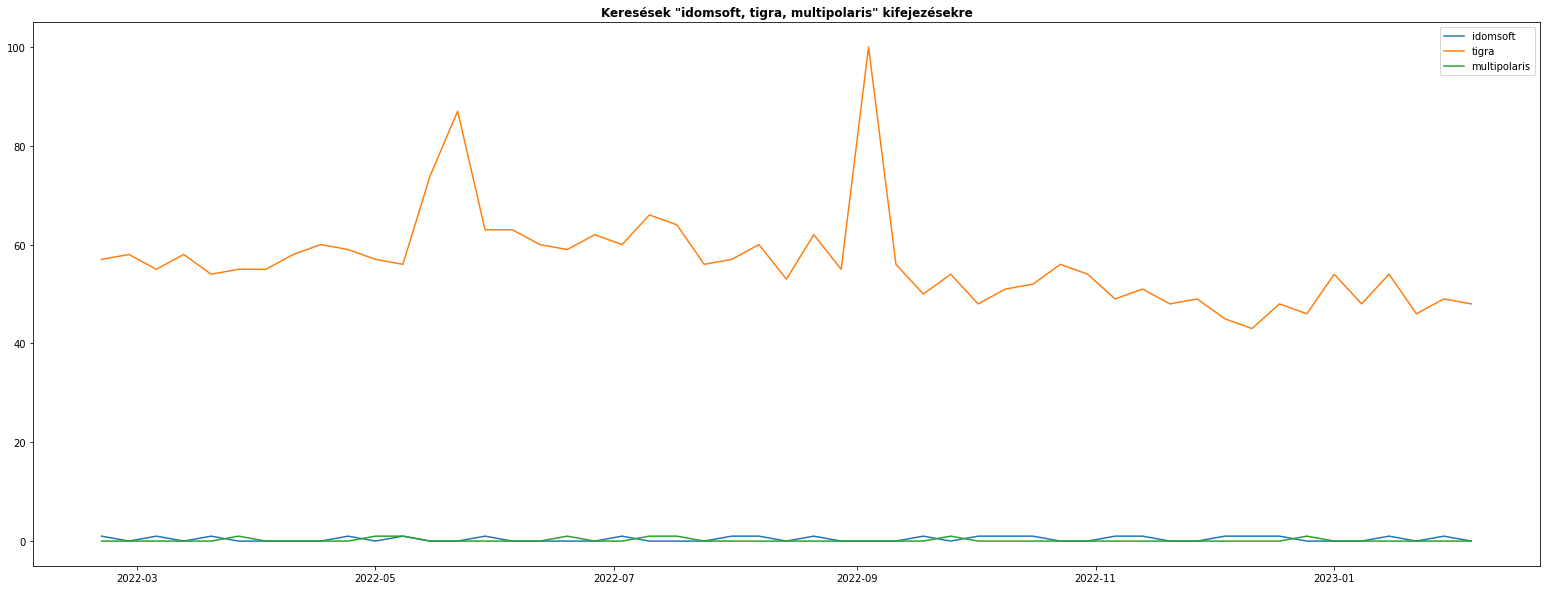

In [46]:
# kulcsszavak a listázáshoz
#kw_list = ["Karácsony Gergely", "Orbán Viktor", "Gyurcsány Ferenc"]
kw_list = ["idomsoft","tigra","multipolaris"]

# kulcsszavak és időtartam alapján adatbetöltés
pytrends.build_payload(kw_list, timeframe='today 12-m')

# a letöltött adatből adattábla előállítása
df = pytrends.interest_over_time()

# megjelenítés...
fig, ax = plt.subplots(figsize=(27,10))

# minden keyword kap egy plotot
for item in kw_list:
    ax.plot(df[item], label=item)

# ha egynél több keresőkifejezés van, akkor többes szám kell a címben
if len(kw_list) > 1: multi = "ek"

plt.title('Keresések "{}" kifejezés{}re'.format(', '.join(kw_list), multi), fontweight='bold')

# dobunk hozzá magyarázat
ax.legend()


In [19]:


#get today's treniding topics

pt2 = TrendReq()
trendingtoday = pt2.today_searches(pn='US')
trendingtoday.head(20)

0    /trends/explore?q=Super+Bowl+2023+commercials&...
Name: exploreLink, dtype: object

In [35]:
treding_df = pt2.top_charts(2022, hl='hu_HU', tz=60, geo='HU')

In [36]:
treding_df.head()

,title,exploreQuery
0,Ukrajna,
1,Népszámlálás 2022,
2,Választás 2022,
3,EUR HUF,
4,Orosz-ukrán háború,


<AxesSubplot:xlabel='geoName'>

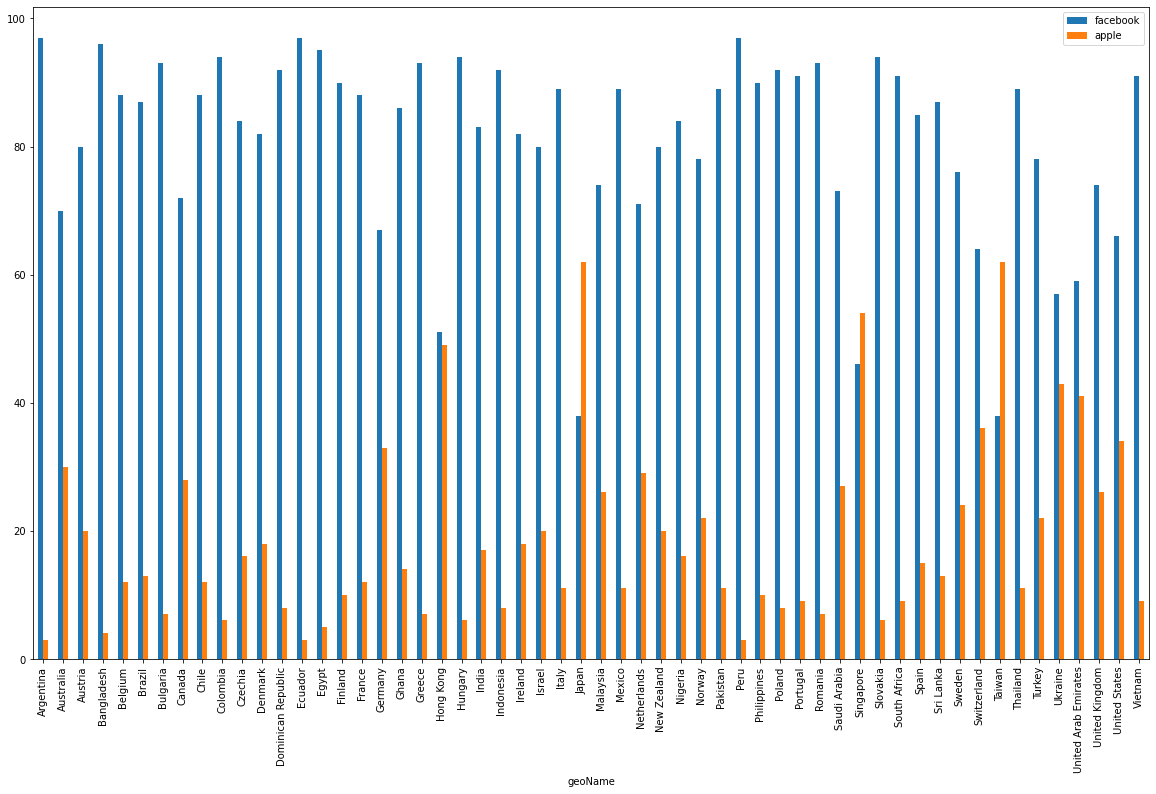

In [39]:
# kulcsszavak a listázáshoz
#kw_list = ["Karácsony Gergely", "Orbán Viktor", "Gyurcsány Ferenc"]
kw_list = ["facebook","apple"]


#search interest per region
#run model for keywords (can also be competitors)
pt2.build_payload(kw_list, timeframe='today 1-m')

# Interest by Region
regiondf = pt2.interest_by_region()
#looking at rows where all values are not equal to 0
regiondf = regiondf[(regiondf != 0).all(1)]

#drop all rows that have null values in all columns
regiondf.dropna(how='all',axis=0, inplace=True)

#visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind ='bar')